In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm
sns.set()  

/home/camilo/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from PIL import Image

Generamos puntos en un espacio 2D que correspondan a 4 clusters, para ello usamos make_blobs de sklearn:

Text(0.5, 0, 'X1')

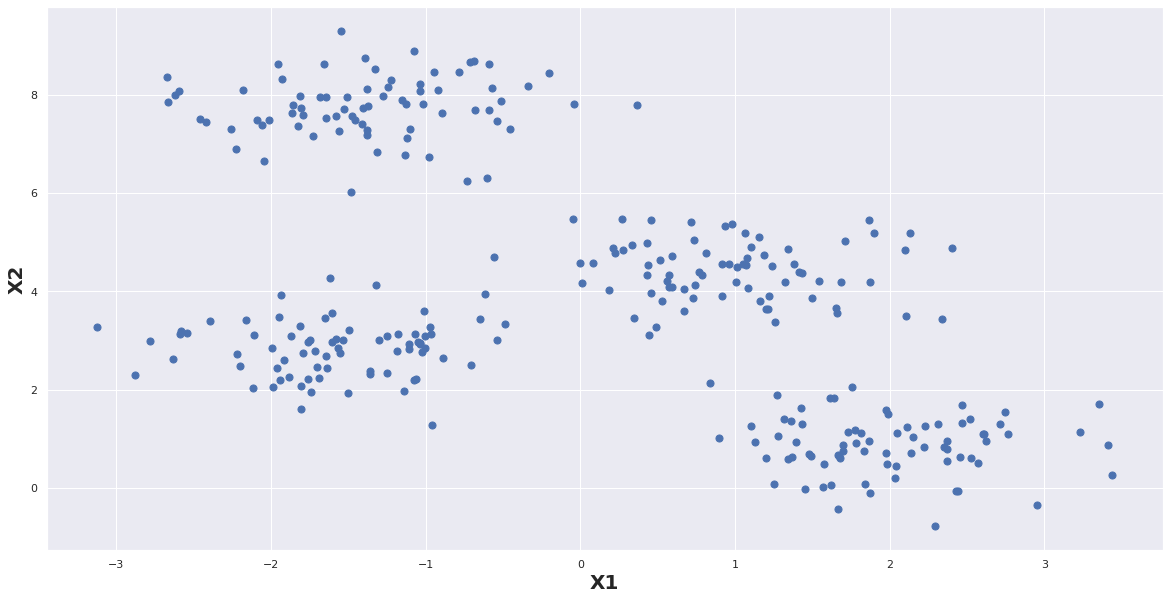

In [3]:
X, y_labels = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.ylabel("X2", fontsize=20, weight="bold")
plt.xlabel("X1", fontsize=20, weight="bold")

Usamos la herramienta KMeans, que busca los clusteres de puntos, retornando los labels de cada punto (a qué clase pertenece) y los centroides de dichos clusteres. 

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Text(0.5, 0, 'X1')

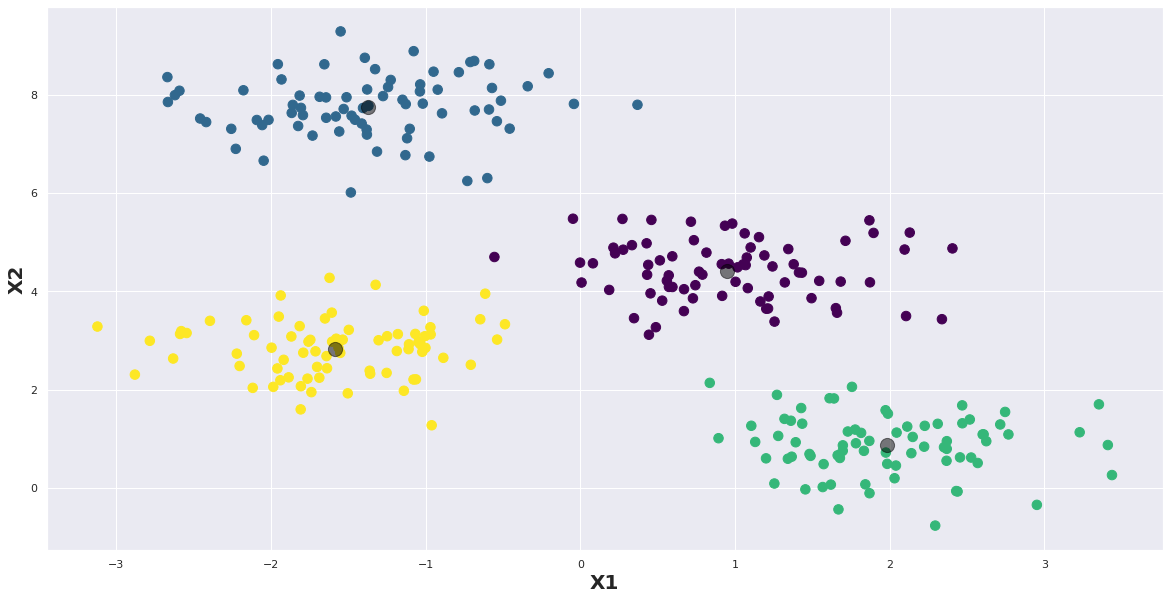

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=90, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel("X2", fontsize=20, weight="bold")
plt.xlabel("X1", fontsize=20, weight="bold")


In [6]:
clusters = np.unique(y_kmeans)
clusters

array([0, 1, 2, 3], dtype=int32)

In [7]:
ordered_points = X[np.where(y_kmeans==clusters[0])]
for i in clusters[1:]:
    points_cluster_i_index = np.where(y_kmeans==i)
    points_cluster_i = X[points_cluster_i_index]
    ordered_points = np.vstack((ordered_points, points_cluster_i))

In [8]:
distance_matrix = euclidean_distances(ordered_points, ordered_points)

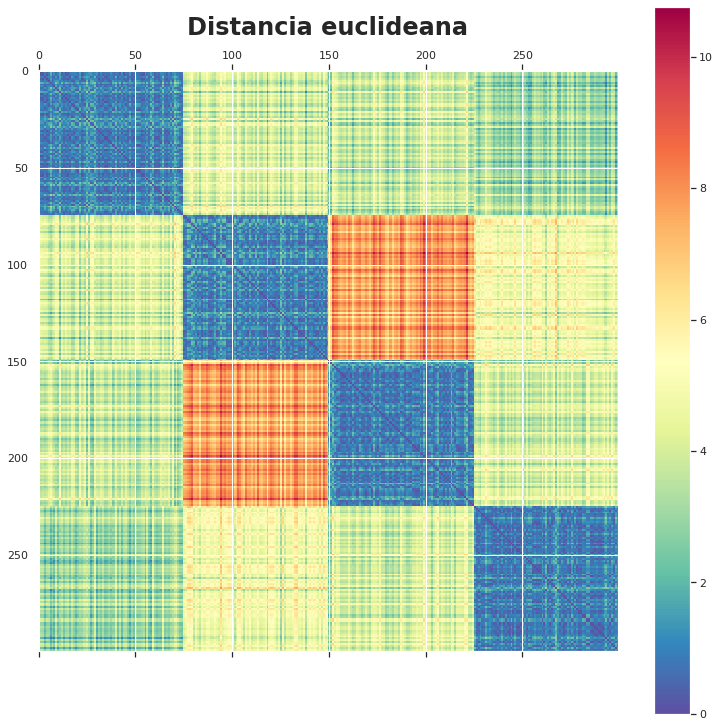

In [9]:
fig, ax = plt.subplots(figsize=(13, 13))
cax = ax.matshow(distance_matrix, interpolation='nearest', cmap=matplotlib.cm.Spectral_r)
fig.colorbar(cax)
ax.grid(True)
plt.title("Distancia euclideana", fontsize=24, weight="bold")
plt.show()

Pero, ¿cómo funciona el algoritmo? 

Text(0.5, 0, 'X1')

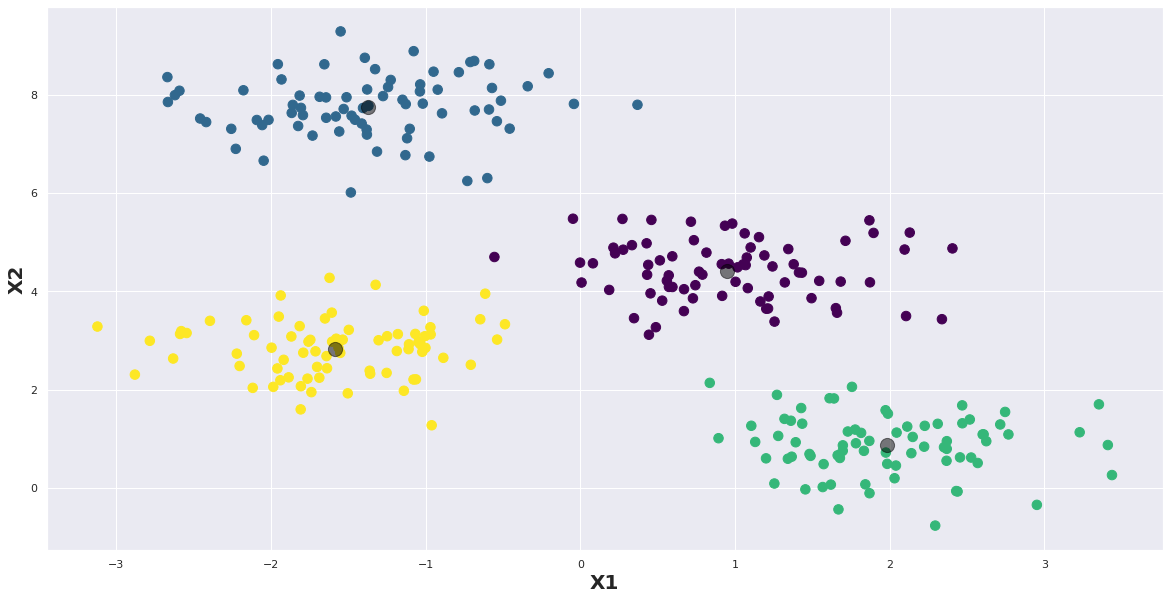

In [10]:
from sklearn.metrics import pairwise_distances_argmin
images = []

def find_clusters(X, n_clusters, rseed=2):
    # 1. Seleccionamos de manera aleatoria los primeros valores de los centroides
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    j=0
    while True:
        """2a. Asignamos a qué cluster pertenece según su cercanía al centroide
           pairwise_distances_argmin retorna array de indices, cada índice corresponde con el índice del controide 
           más cercano para ese punto"""
        
        labels = pairwise_distances_argmin(X, centers)
        
        """2b. Buscamos los nuevo centroides, calculados como el promedio (en cada dimension) de los puntos de
           cada cluster"""
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. si los centroides no cambiaron respecto al paso anterior, stop
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

plt.figure(figsize=(20,10))
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=90, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel("X2", fontsize=20, weight="bold")
plt.xlabel("X1", fontsize=20, weight="bold")


Observamos ahora como se mueven los centroides en las iteraciones del código anterior:


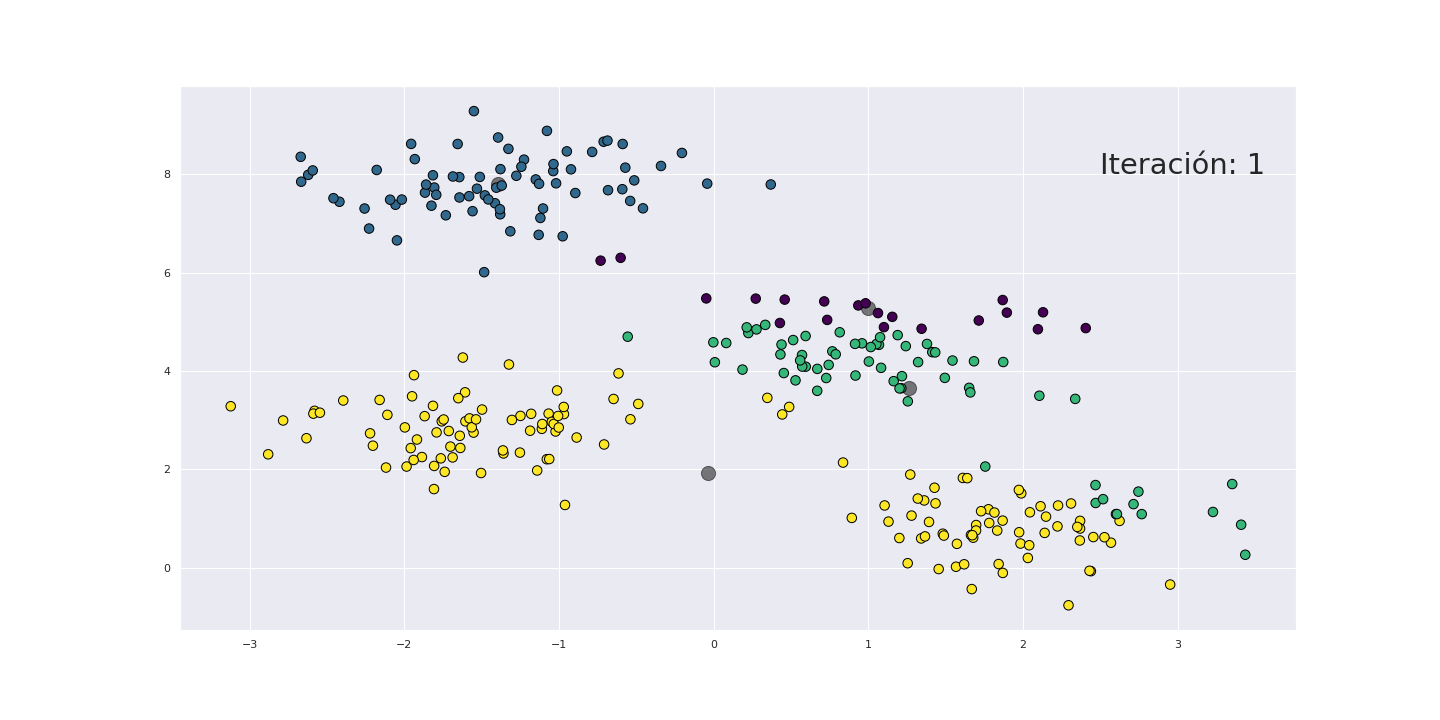

In [11]:
def show_gif(fname):
    import base64
    from IPython import display
    with open(fname, 'rb') as fd:
        b64 = base64.b64encode(fd.read()).decode('ascii')
    return display.HTML(f'<img src="data:image/gif;base64,{b64}" />')

show_gif('images/movie.gif')

¿Qué pasa cuando la inicialización de los centroides no es muy feliz?

Text(0.5, 0, 'X1')

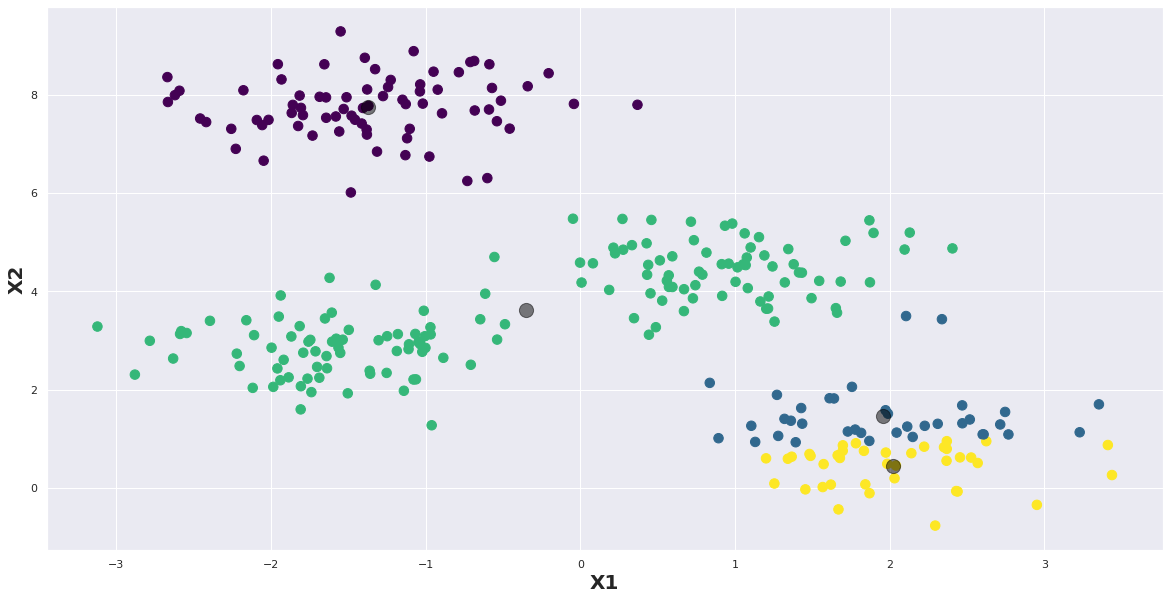

In [12]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=90, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel("X2", fontsize=20, weight="bold")
plt.xlabel("X1", fontsize=20, weight="bold")


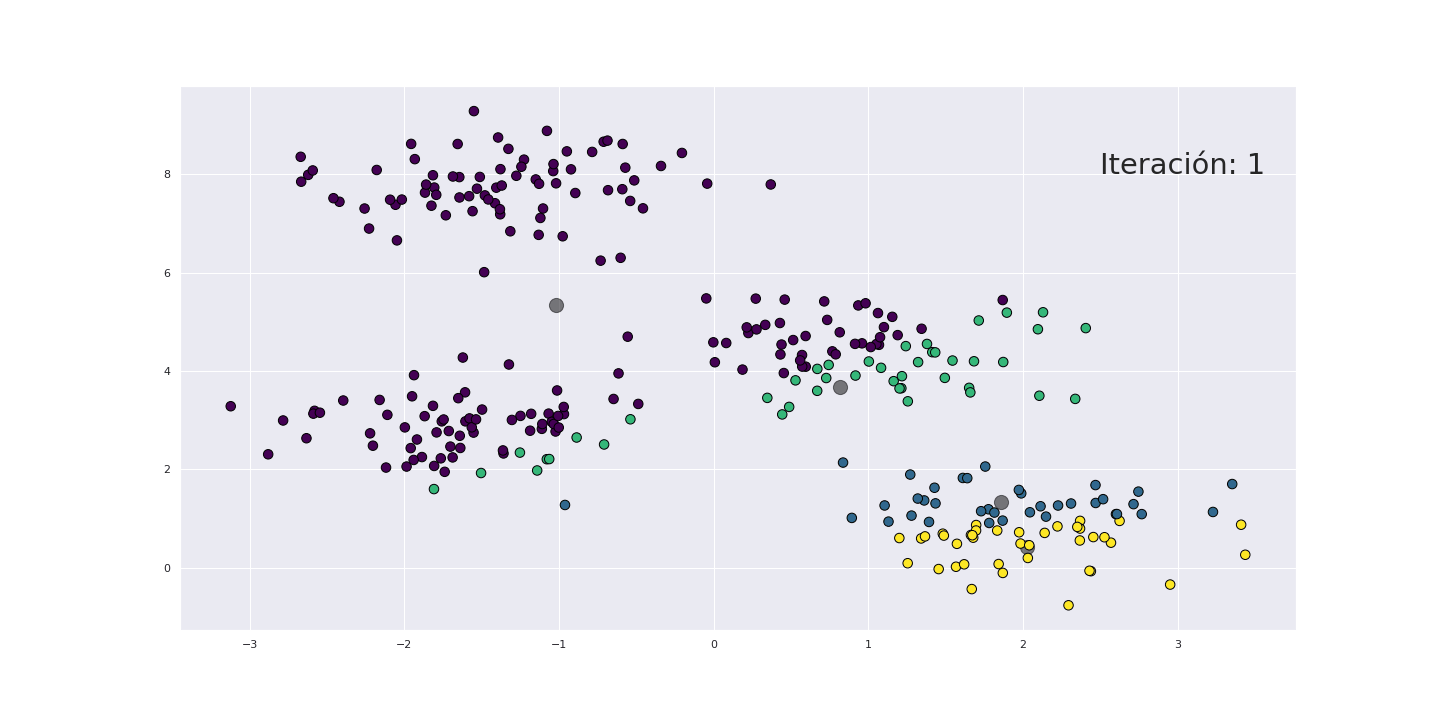

In [13]:
show_gif('gif2/movie.gif')

In [14]:
clusters = np.unique(labels)
ordered_points = X[np.where(y_kmeans==clusters[0])]
for i in clusters[1:]:
    points_cluster_i_index = np.where(labels==i)
    points_cluster_i = X[points_cluster_i_index]
    ordered_points = np.vstack((ordered_points, points_cluster_i))

In [15]:
distance_matrix = euclidean_distances(ordered_points, ordered_points)

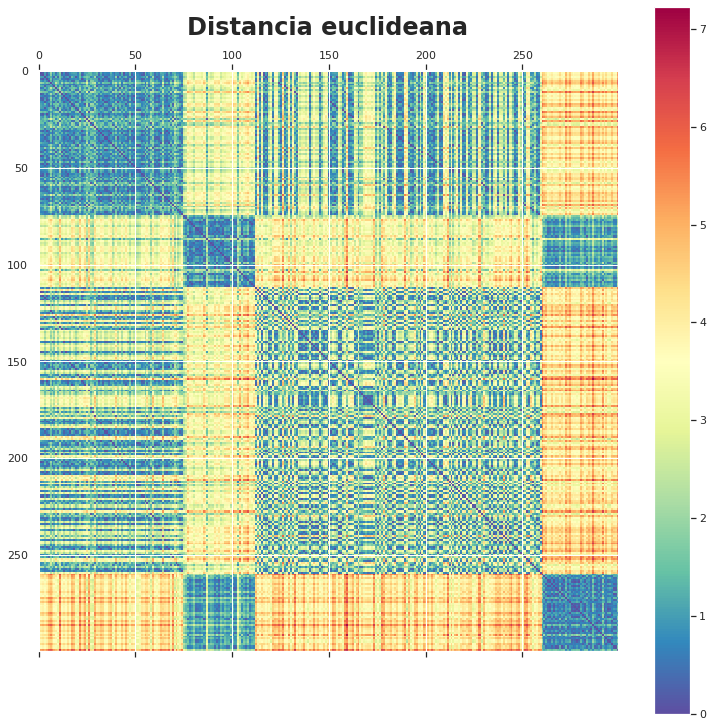

In [16]:
fig, ax = plt.subplots(figsize=(13,13))
cax = ax.matshow(distance_matrix, interpolation='nearest', cmap=matplotlib.cm.Spectral_r)
fig.colorbar(cax)
ax.grid(True)
plt.title("Distancia euclideana", fontsize=24, weight="bold")
plt.show()

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Ahora vemos que pasa cuando se complican un poco más los datos:

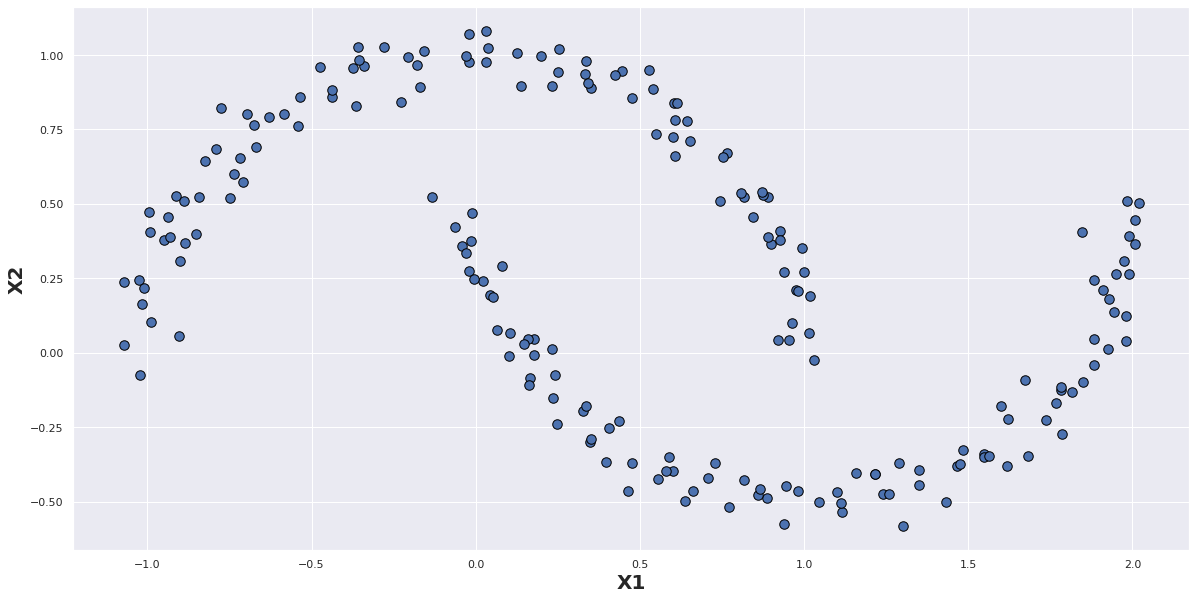

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], edgecolor='black', s=90, cmap='viridis')
plt.ylabel("X2", fontsize=20, weight="bold")
plt.xlabel("X1", fontsize=20, weight="bold");

Qué pasa si aplicamos kmeans a esto? 

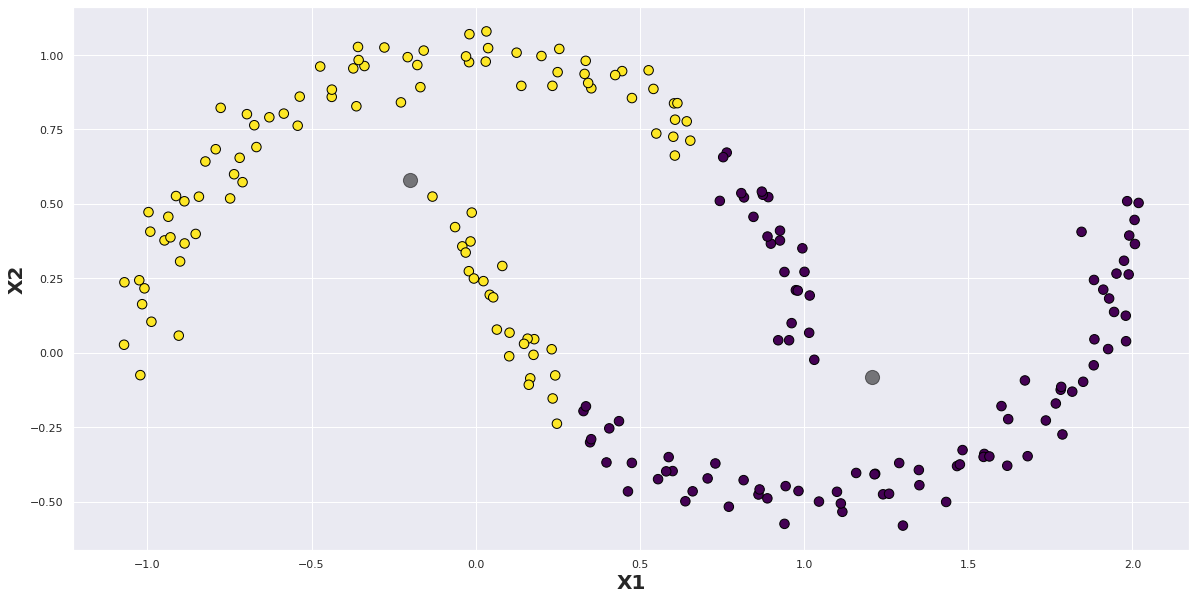

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='black', s=90, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel("X2", fontsize=20, weight="bold")
plt.xlabel("X1", fontsize=20, weight="bold");

In [20]:
cluster_0_id = np.where(labels == 0)
cluster_1_id = np.where(labels == 1)
cluster_0 = X[cluster_0_id]
cluster_1 = X[cluster_1_id]

In [21]:
ordered_points =np.append(cluster_0, cluster_1, axis=0)

In [22]:
distance_matrix = euclidean_distances(ordered_points, ordered_points)

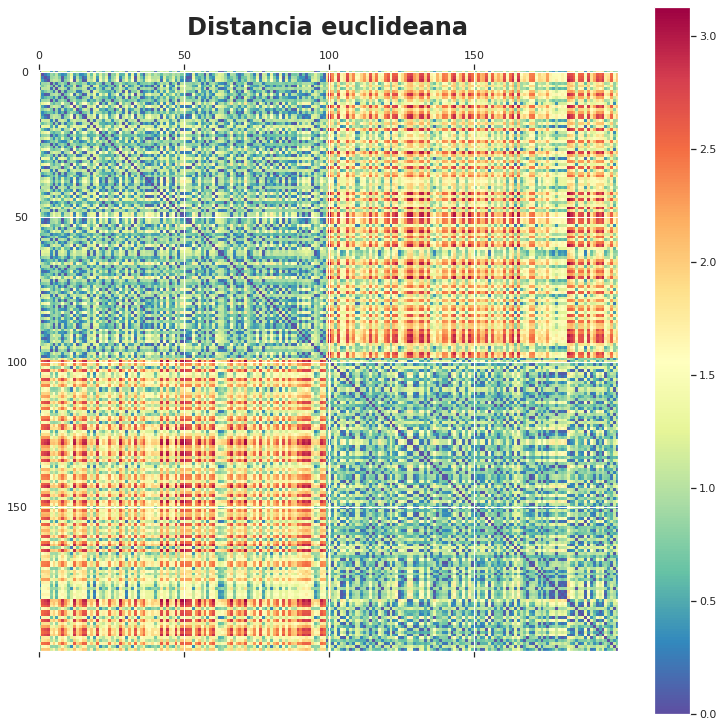

In [23]:
fig, ax = plt.subplots(figsize=(13, 13))
cax = ax.matshow(distance_matrix, interpolation='nearest', cmap=matplotlib.cm.Spectral_r)
fig.colorbar(cax)
ax.grid(True)
plt.title("Distancia euclideana", fontsize=24, weight="bold")
plt.show()

Vemos que los clusters que encuentra el algoritmo no son los correctos. :(

Que pasa con DBSCAN? 

Usamos la herramienta DBSCAN de sklearn

In [24]:
from sklearn.cluster import DBSCAN

Los parámetros más importantes son:
 - **eps**: da la noción de cercanía, es la máxima distancia dentro de la cual 2 puntos son considerados vecinos.
 - **min_samples**: cantidad de vecinos que tiene que tener un punto para se considerado como **core point**.

In [25]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

DBSCAN nos da los *core points* y los *noise points*, además de lac antidad de cluster encontrados y los labels para cada punto (a qué cluster pertenece)

In [26]:
db.core_sample_indices_

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

Los noise points tendrán índice -1 al acceder a labels_ (ojo!)

In [27]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [28]:
db.labels_

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [29]:
n_clusters_

2

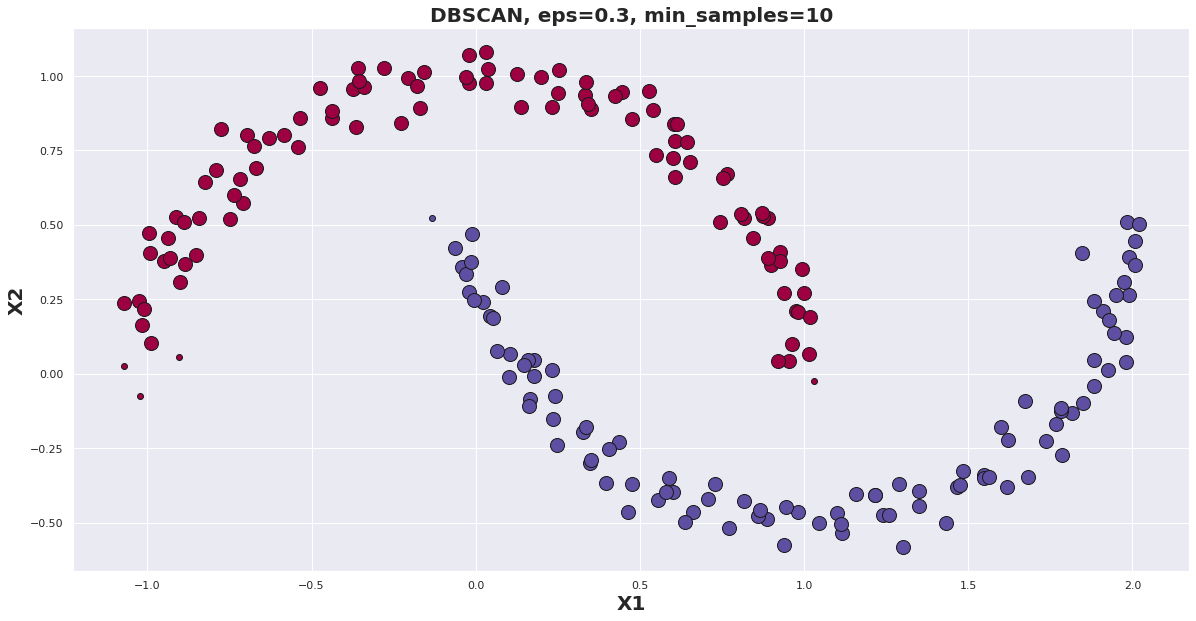

In [30]:
unique_labels = set(labels)
plt.figure(figsize=(20,10))
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("DBSCAN, eps=0.3, min_samples=10", fontsize=20, weight="bold")
plt.ylabel("X2", fontsize=20, weight="bold")
plt.xlabel("X1", fontsize=20, weight="bold");

Cambio **eps**, noción de cernanía.

In [31]:
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [32]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [33]:
n_clusters_

2

Text(0.5, 0, 'X1')

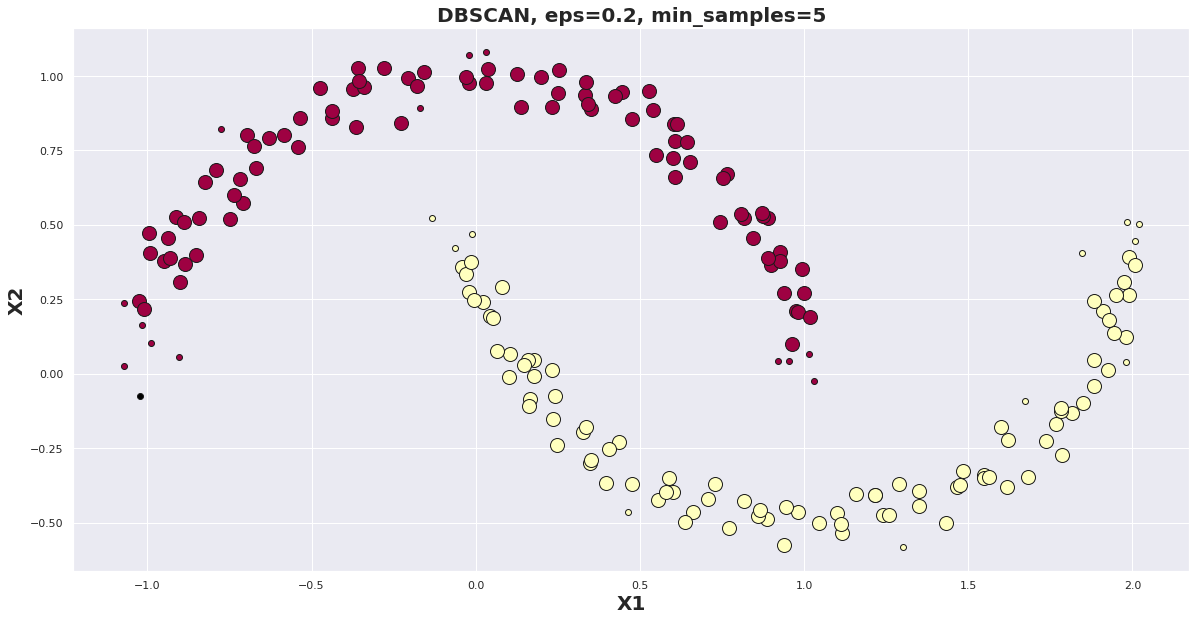

In [34]:
unique_labels = set(labels)
plt.figure(figsize=(20,10))
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("DBSCAN, eps=0.2, min_samples=5", fontsize=20, weight="bold")
plt.ylabel("X2", fontsize=20, weight="bold")
plt.xlabel("X1", fontsize=20, weight="bold")

In [35]:
db.labels_

array([ 0,  1,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1])

In [36]:
cluster_0_id = np.where(db.labels_ == 0)
cluster_1_id = np.where(db.labels_ == 1)

In [37]:
cluster_0 = X[cluster_0_id]

In [38]:
cluster_1 = X[cluster_1_id]

In [39]:
ordered_points =np.append(cluster_0, cluster_1, axis=0)

In [40]:
distance_matrix = euclidean_distances(ordered_points, ordered_points)

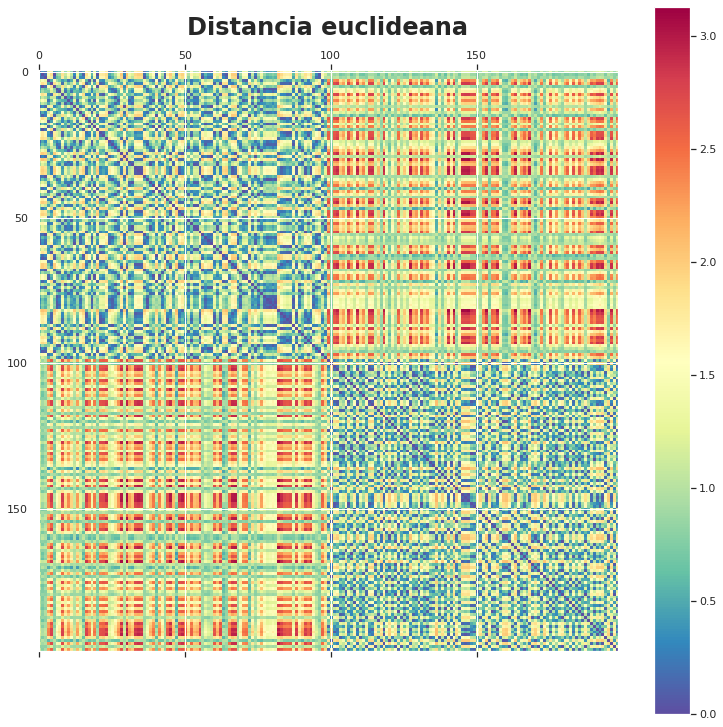

In [41]:
fig, ax = plt.subplots(figsize=(13,13))
cax = ax.matshow(distance_matrix, interpolation='nearest', cmap=matplotlib.cm.Spectral_r)
fig.colorbar(cax)
ax.grid(True)
plt.title("Distancia euclideana", fontsize=24, weight="bold")
plt.show()

Aumento **min_samples**

In [42]:
db = DBSCAN(eps=0.2, min_samples=13).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [43]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [44]:
n_clusters_

8

Text(0.5, 0, 'X1')

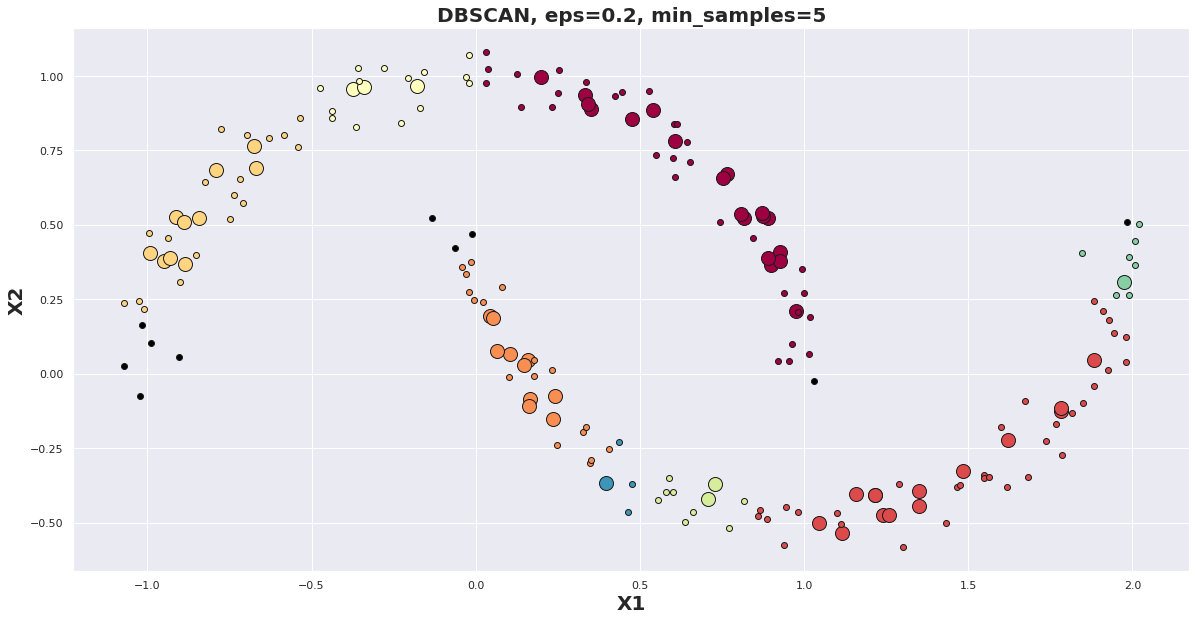

In [45]:
unique_labels = set(labels)
plt.figure(figsize=(20,10))
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("DBSCAN, eps=0.2, min_samples=5", fontsize=20, weight="bold")
plt.ylabel("X2", fontsize=20, weight="bold")
plt.xlabel("X1", fontsize=20, weight="bold")

Muchos menos core points, más clusters, más noise points

Finalmente, notar que los centroides de kmeans son puntos representativos del cluster. Por ejemplo, si corremos kmeans en el dataset de MNIST:

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [47]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [48]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

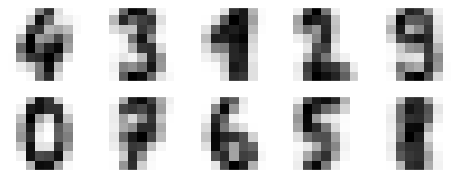

In [49]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vemos como en promedio es escrito cada número.